In [8]:
import math

E_1s = -13.6

def calc_S_ab(R):
    coefficient = 1 + R +(R**2 / 3)
    return coefficient * math.exp(-R)

def calc_H_aa(R):
    return E_1s * (1 - ( 2 * ( 1+ (1/R) ) * math.exp(-2 * R) ) )

def calc_H_ab(R):
    coefficient = (-2/R) + 1 + ( (7/3) * R ) + ( (R**2)/3 )
    return E_1s * coefficient * math.exp(-R)

def calc_E_plus(R):
     return calc_H_aa(R) + calc_H_ab(R) / (1 + calc_S_ab(R) )

def calc_E_minus(R):
     return calc_H_aa(R) - calc_H_ab(R) / (1 - calc_S_ab(R) )

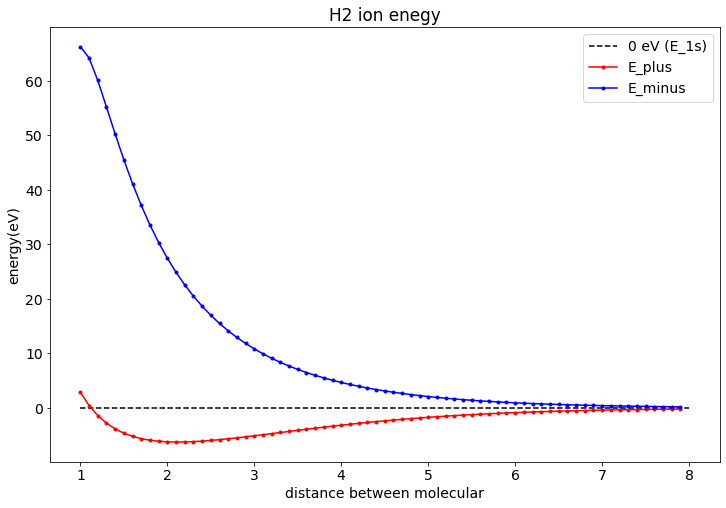

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plt.rcParams["font.size"] = 14
plt.title("H2 ion enegy")
plt.xlabel("distance between molecular")
plt.ylabel("energy(eV)")

x_list = [i / 10 for i in range(10, 80)]
E_plus_list = [ calc_E_plus(i) - E_1s for i in x_list]
E_minus_list = [ calc_E_minus(i) - E_1s for i in x_list]

plt.hlines(0, 1, 8, colors='black', linestyles='dashed', label='0 eV (E_1s)')
plt.plot(x_list, E_plus_list, marker='.', color='red', label='E_plus')
plt.plot(x_list, E_minus_list, marker='.', color='blue', label='E_minus')
plt.legend()

In [10]:
import numpy as np
## newton法でparameterを更新して数値解を出す
def calc_ground_energy(f, x0, eps=1e-12, max_loop=100):
    x_list = []
    y_list = []
    n = 1
    x = x0
    while True:
        df = (f(x0 +eps) -f(x0 -eps))/(2*eps)
        x = x - f(x)/df
        x_list.append(x)
        y_list.append(f(x))
        n += 1
        if abs(f(x)) < eps or n > max_loop:
            break

    return x_list, y_list

## 初期値
x0 = 1.2
x_list, y_list = calc_ground_energy(calc_E_plus, x0)
min_index = np.argmin(np.array(y_list))
print("水素分子間距離がボーア半径の約 {:.3f}倍, 結合エネルギーは {:.3f}".format(x_list[min_index], y_list[min_index]))


水素分子間距離がボーア半径の約 2.152倍, 結合エネルギーは -19.848
